## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from scipy import interp
import itertools

## Exploratory data analysis

In [8]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
#Missing Value Analysis
df.isnull().values.any()

False

In [10]:
#observe the different feature type present in the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [11]:
df.describe() #Describing the distribution of the each column

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Here we will observe the distribution of our classes

In [12]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

# EXPLORATORY DATA ANALYSIS

###### Percentage of regular and fraud Transactions

In [13]:
print('Percentage of Normal Transactions: {}%'.format(round(df.Class.value_counts()[0]/len(df) * 100.0,2)))
print('Percentage of Frauds: {}%'.format(round(df.Class.value_counts()[1]/len(df) * 100.0,2)))

Percentage of Normal Transactions: 99.83%
Percentage of Frauds: 0.17%


###### Normal and fraud Dataset Creation

In [14]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


Text(0, 0.5, 'Frequency')

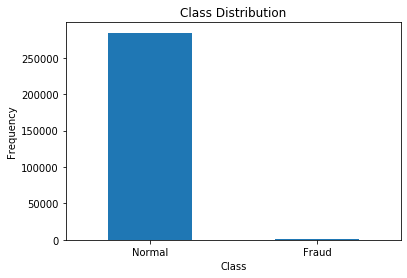

In [15]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
#sns.barplot(x= 'Normal' y= 'Fraud', data = df)
LABELS = ["Normal", "Fraud"]
count_classes = pd.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")


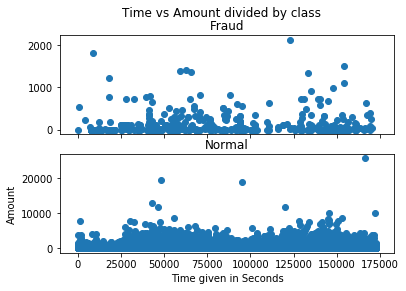

In [16]:
# Create a scatter plot to observe the distribution of classes with time
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time vs Amount divided by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time given in Seconds')
plt.ylabel('Amount')
plt.show()


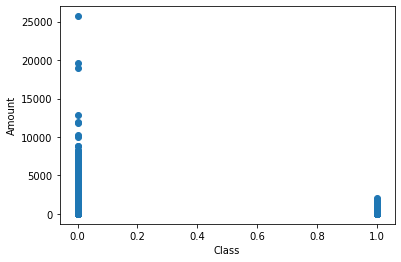

In [17]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.scatter(df.Class, df.Amount)
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

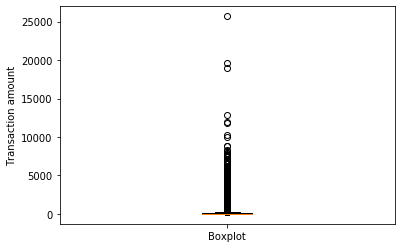

In [18]:
# Let us further analyze the variable "Amount"
plt.boxplot(df['Amount'], labels = ['Boxplot'])
plt.ylabel('Transaction amount')
plt.plot()

amount = df[['Amount']].sort_values(by='Amount')

In [19]:
q1, q3 = np.percentile(amount,[25,75])
q1,q3

(5.6, 77.16499999999999)

In [20]:
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print('# outliers below the lower bound: ', amount[amount['Amount'] < lower_bound].count()[0],
     ' ({:.4}%)'.format(amount[amount['Amount'] < lower_bound].count()[0] / amount['Amount'].count() * 100))
print('# outliers above the upper bound: ', amount[amount['Amount'] > upper_bound].count()[0],
      ' ({:.4}%)'.format(amount[amount['Amount'] > upper_bound].count()[0] / amount['Amount'].count() * 100))

# outliers below the lower bound:  0  (0.0%)
# outliers above the upper bound:  31904  (11.2%)


If we delete this outliers we will be losing about 11.2% of Data

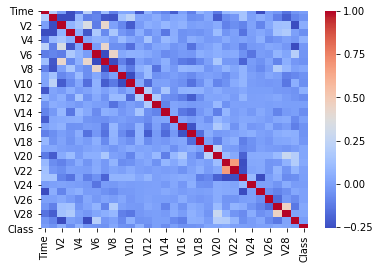

In [21]:
#Checking Corelation with the Heatmap
heatmap = sns.heatmap(df.corr(method='spearman'),cmap='coolwarm',robust = True)

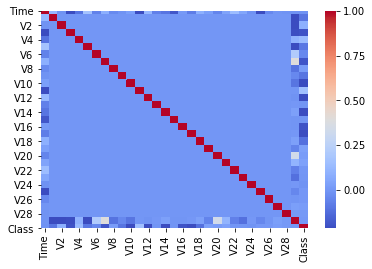

In [22]:
heatmap = sns.heatmap(df.corr(method='pearson'),cmap='coolwarm',robust = True)

Because of PCA Transformation we have not found any Corelation Issues

In [23]:
# Drop unnecessary columns
df = df.drop(['Time'], axis=1)

Since Time Variable will not contribute much to our model we are dropping it for better efficiency

In [24]:
df.shape

(284807, 30)

##### DATA SCALING

In [25]:
from sklearn.preprocessing import StandardScaler
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


We can see the situation of class imbalance clearly

### Splitting the data into train & test data

In [26]:
y= df['Class']
X = df.drop(columns=['Class'])

In [27]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [28]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold

In [30]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

### MODEL BUILDING

In [31]:
import statsmodels.api as sm

In [32]:
# Building simple Logistic regression model without balancung the result
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199334
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -716.43
Date:                Mon, 03 Aug 2020   Deviance:                       1432.9
Time:                        19:42:25   Pearson chi2:                 5.08e+05
No. Iterations:                    13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0991      0.237    -38.450      0.000      -9.563      -8.635
V1             0.1012      0.054      1.883      0.060      -0.004       0.207
V2             0.0811      0.097      0.833      0.405      -0.110       0.272
V3             0.0128      0.056      0.228      0.820      -0.097       0.122
V4             0.9014      0.133      6.795      0.000       0.641       1.161
V5             0.1858      0.098      1.900      0.057      -0.006       0.378
V6            -0.0643      0.089     -0.720      0.471      -0.239       0.111
V7            -0.1126      0.101     -1.118      0.263      -0.310       0.085
V8            -0.1210      0.037     -3.285      0.001      -0.193      -0.049
V9            -0.1556      0.181     -0.859      0.390      -0.511       0.199
V10           -0.9871      0.146     -6.742      0.000      -1.274      -0.700
V11           -0.0388      0.093     -0.415      0.678      -0.222       0.144
V12            0.3049      0.141      2.165      0.030       0.029       0.581
V13           -0.4842      0.106     -4.570      0.000      -0.692      -0.277
V14           -0.5396      0.088     -6.138      0.000      -0.712      -0.367
V15           -0.0125      0.111     -0.113      0.910      -0.229       0.204
V16           -0.3059      0.191     -1.604      0.109      -0.680       0.068
V17           -0.1040      0.108     -0.966      0.334      -0.315       0.107
V18            0.0932      0.198      0.471      0.638      -0.295       0.481
V19           -0.0151      0.136     -0.111      0.912      -0.282       0.252
V20           -0.5348      0.099     -5.377      0.000      -0.730      -0.340
V21            0.3996      0.079      5.027      0.000       0.244       0.555
V22            0.6132      0.179      3.430      0.001       0.263       0.964
V23           -0.0953      0.073     -1.301      0.193      -0.239       0.048
V24            0.1326      0.182      0.730      0.466      -0.223       0.489
V25           -0.0096      0.164     -0.059      0.953      -0.330       0.311
V26            0.3069      0.260      1.180      0.238      -0.203       0.817
V27           -0.9113      0.134     -6.821      0.000      -1.173      -0.649
V28           -0.2809      0.114     -2.461      0.014      -0.505      -0.057
Amount         0.2860      0.132      2.160      0.031       0.026       0.546
==============================================================================
"""

In [33]:
#Feature selection using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [34]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # we are running the RFE as 15 variables as output
rfe = rfe.fit(X_train, y_train)

C:\Users\Bustec\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [35]:
rfe.support_

array([ True, False, False,  True, False, False,  True, False,  True,
        True, False,  True,  True,  True, False,  True, False, False,
       False,  True,  True,  True, False, False, False, False,  True,
        True,  True])

In [36]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('V1', True, 1),
 ('V2', False, 9),
 ('V3', False, 13),
 ('V4', True, 1),
 ('V5', False, 3),
 ('V6', False, 10),
 ('V7', True, 1),
 ('V8', False, 5),
 ('V9', True, 1),
 ('V10', True, 1),
 ('V11', False, 11),
 ('V12', True, 1),
 ('V13', True, 1),
 ('V14', True, 1),
 ('V15', False, 12),
 ('V16', True, 1),
 ('V17', False, 8),
 ('V18', False, 7),
 ('V19', False, 15),
 ('V20', True, 1),
 ('V21', True, 1),
 ('V22', True, 1),
 ('V23', False, 6),
 ('V24', False, 2),
 ('V25', False, 14),
 ('V26', False, 4),
 ('V27', True, 1),
 ('V28', True, 1),
 ('Amount', True, 1)]

In [37]:
col = X_train.columns[rfe.support_]

In [38]:
X_train.columns[~rfe.support_]

Index(['V2', 'V3', 'V5', 'V6', 'V8', 'V11', 'V15', 'V17', 'V18', 'V19', 'V23',
       'V24', 'V25', 'V26'],
      dtype='object')

In [39]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199348
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -734.42
Date:                Mon, 03 Aug 2020   Deviance:                       1468.8
Time:                        19:43:36   Pearson chi2:                 4.30e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.9361      0.190    -46.983      0.000      -9.309      -8.563
V1             0.2155      0.047      4.580      0.000       0.123       0.308
V4             0.7885      0.087      9.091      0.000       0.618       0.958
V7            -0.1821      0.081     -2.261      0.024      -0.340      -0.024
V9            -0.2867      0.112     -2.562      0.010      -0.506      -0.067
V10           -0.8087      0.108     -7.516      0.000      -1.020      -0.598
V12            0.2280      0.093      2.452      0.014       0.046       0.410
V13           -0.4859      0.102     -4.761      0.000      -0.686      -0.286
V14           -0.6206      0.066     -9.375      0.000      -0.750      -0.491
V16           -0.2317      0.086     -2.702      0.007      -0.400      -0.064
V20           -0.5037      0.077     -6.512      0.000      -0.655      -0.352
V21            0.4954      0.080      6.193      0.000       0.339       0.652
V22            0.6886      0.155      4.436      0.000       0.384       0.993
V27           -0.9981      0.126     -7.908      0.000      -1.245      -0.751
V28           -0.1867      0.119     -1.565      0.118      -0.421       0.047
Amount         0.2648      0.095      2.782      0.005       0.078       0.451
==============================================================================
"""

In [40]:
#Acess the model with the stats madel
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([3.75279562e-05, 4.96492246e-04, 6.97428512e-05, 2.69386138e-05,
       6.32129103e-05, 2.93240268e-05, 3.38797979e-04, 3.29669590e-04,
       2.19123374e-03, 4.94185223e-05])

In [41]:
y_train_pred_final = pd.DataFrame({'Class':y_train.values, 'Class_Prob':y_train_pred})
y_train_pred_final.head()

,Class,Class_Prob
0,0,0.000038
1,0,0.000496
2,0,0.000070
3,0,0.000027
4,0,0.000063


In [42]:
y_train_pred_final['predicted'] = y_train_pred_final.Class_Prob.map(lambda x: 0 if x < 0.01 else 1)
y_train_pred_final.tail()

,Class,Class_Prob,predicted
199359,0,0.000054,0
199360,0,0.000382,0
199361,0,0.000367,0
199362,0,0.000792,0
199363,0,0.000265,0


In [43]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final.predicted )
print(confusion)

[[198548    472]
 [    43    301]]


In [44]:
#Checking the Accuracy
print(metrics.accuracy_score(y_train_pred_final.Class, y_train_pred_final.predicted))

0.9974167853775004


## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN
- Random Undersampling

In [45]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
249927,-0.012102,0.707332,0.163334,-0.756498,0.590999,-0.653429,0.844608,-0.001672,-0.184399,-0.222719,...,-0.038329,-0.231385,-0.572415,0.042660,-0.360882,-0.494703,0.142657,0.235922,0.083758,-0.324723
214082,1.776151,-0.184642,-2.204096,1.191668,0.614461,-1.016525,0.919254,-0.387465,-0.318277,0.517022,...,-0.030437,0.281190,0.530070,-0.232262,-0.342096,0.492355,-0.427682,-0.075228,-0.056755,0.246484
106005,-1.083391,-4.440527,-1.399530,0.469764,-2.076458,-0.766137,1.601441,-0.709176,-1.288745,0.086419,...,2.189260,0.346463,-1.432833,-1.097063,0.505926,-0.140185,0.870190,-0.316982,0.227833,4.854238
58619,-0.518847,1.025087,-0.614624,-0.780959,2.474666,3.335055,0.046111,0.794249,-0.322448,0.128383,...,0.225957,-0.193099,-0.708348,0.145672,0.944217,-0.788017,0.039995,0.010804,0.254309,-0.335278
191638,-0.640421,0.212171,0.283341,-1.786916,2.616127,4.024863,-0.198897,0.937087,0.474428,-0.283699,...,0.154309,0.167939,0.759218,-0.321412,0.767971,-0.084221,0.612936,0.074029,-0.033344,-0.335278


## Random Undersampling

In this method, you have the choice of selecting fewer data points from the majority class for your model-building process. In case you have only 500 data points in the minority class, you will also have to take 500 data points from the majority class; this will make the classes somewhat balanced. However, in practice, this method is not effective because you will lose over 99% of the original data.

In [46]:
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42, replacement=False)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [ ]:
X_rus.shape,y_rus.shape

In [ ]:
y_rus.head()

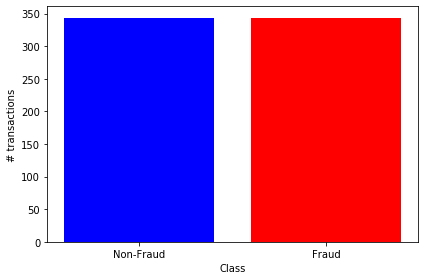

In [47]:
plt.bar(['Non-Fraud','Fraud'], [Counter(y_rus)[0], Counter(y_rus)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('# transactions')

plt.tight_layout()
plt.show()

In [ ]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_rus)))

## Random Oversampling

Random oversampling involves randomly minority points from the minority to group to match the length of the majority class. The process is entirely randowm it takes few rows from the minority class and adds up

In [49]:
ros = RandomOverSampler(sampling_strategy='auto', random_state=48)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

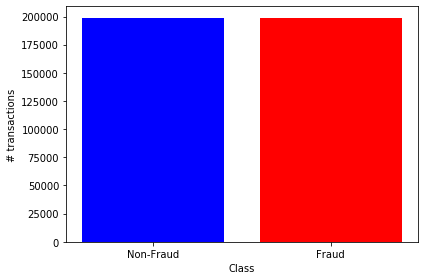

In [50]:
plt.bar(['Non-Fraud','Fraud'], [Counter(y_ros)[0], Counter(y_ros)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('# transactions')

plt.tight_layout()
plt.show()

In [51]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_ros)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 199020, 1: 199020})


## Synthetic Minority Over-Sampling Technique (SMOTE)

In this process, you can generate new data points, which lie vectorially between two data points that belong to the minority class. These data points are randomly chosen and then assigned to the minority class. This method uses K-nearest neighbours to create random synthetic samples

In [52]:
smote = SMOTE(sampling_strategy='auto', random_state=48)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

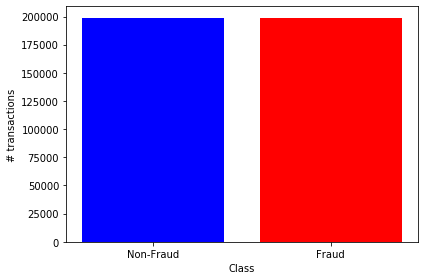

In [53]:
plt.bar(['Non-Fraud','Fraud'], [Counter(y_smote)[0], Counter(y_smote)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('# transactions')

plt.tight_layout()
plt.show()

In [54]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_smote)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 199020, 1: 199020})


## ADASyn(Adaptive synthesis)

This is similar to SMOTE, with a minor change in the generation of synthetic sample points for minority data points. For a particular data point, the number of synthetic samples that it will add will have a density distribution, whereas, for SMOTE, the distribution will be uniform. The aim here is to create synthetic data for minority examples that are harder to learn, rather than the easier ones

In [55]:
from imblearn.over_sampling import ADASYN

In [57]:
ads = ADASYN(sampling_strategy='auto', random_state=48)
X_ads, y_ads = ads.fit_resample(X_train, y_train)

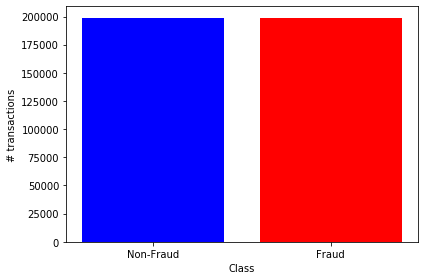

In [58]:
plt.bar(['Non-Fraud','Fraud'], [Counter(y_ads)[0], Counter(y_ads)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('# transactions')

plt.tight_layout()
plt.show()

In [59]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_ads)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({1: 199035, 0: 199020})


We will create 2d plot to visualize the transformed data

In [61]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#8c564b', '#FF7F0E']
    markers = ['v', '^']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [62]:
pca = PCA(n_components=2)
X_ros_pca = pca.fit_transform(X_ros)
X_smote_pca = pca.fit_transform(X_smote)
X_ads_pca = pca.fit_transform(X_ads)
X_rus_pca = pca.fit_transform(X_rus)


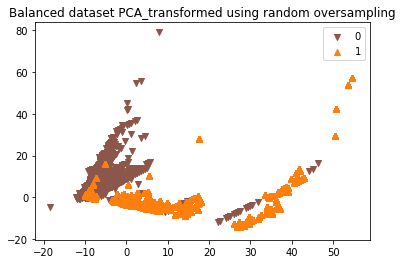

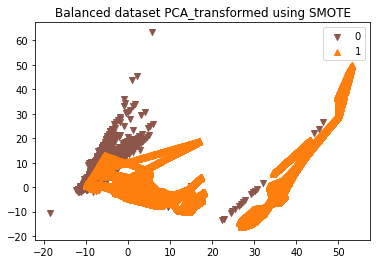

In [63]:
plot_2d_space(X_ros_pca, y_ros, 'Balanced dataset PCA_transformed using random oversampling')
plot_2d_space(X_smote_pca, y_smote, 'Balanced dataset PCA_transformed using SMOTE')

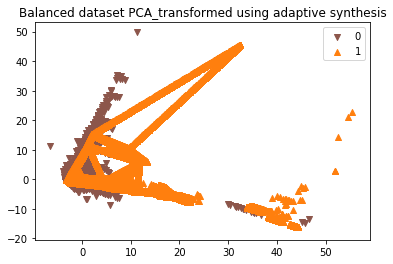

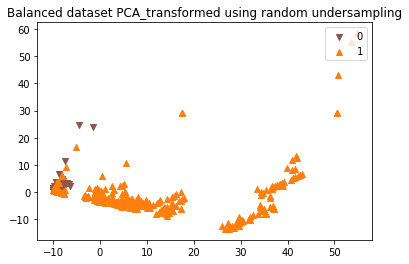

In [64]:
plot_2d_space(X_ads_pca, y_ads, 'Balanced dataset PCA_transformed using adaptive synthesis')
plot_2d_space(X_rus_pca, y_rus, 'Balanced dataset PCA_transformed using random undersampling')

## Logistic regression on random undersampling data

In [65]:
lr = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
lr.fit(X_rus, y_rus)

LogisticRegression(max_iter=200, n_jobs=-1, random_state=0)

In [66]:
lr_predict = lr.predict(X_test)

In [67]:
lr_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Prediction scores

Accuracy: 97.5844%
Recall: 87.8378%
ROC AUC: 92.7196%


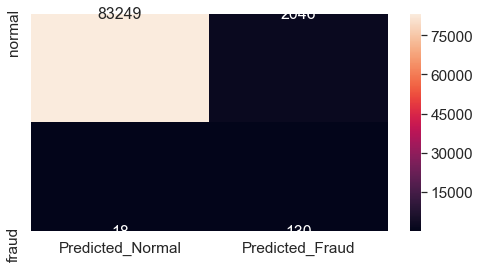

In [68]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
from matplotlib import pyplot

lr_accuracy = accuracy_score(y_test, lr_predict)
lr_recall = recall_score(y_test, lr_predict)
lr_cm = confusion_matrix(y_test, lr_predict)
lr_auc = roc_auc_score(y_test, lr_predict)

print("Accuracy: {:.4%}".format(lr_accuracy))
print("Recall: {:.4%}".format(lr_recall))
print("ROC AUC: {:.4%}".format(lr_auc))

lr_cm = pd.DataFrame(lr_cm, ['normal','fraud'],['Predicted_Normal','Predicted_Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(lr_cm, annot=True,annot_kws={"size": 16},fmt='g')

## Logistic regression on random oversampling data¶

In [69]:
lr = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
lr.fit(X_ros, y_ros)

LogisticRegression(max_iter=200, n_jobs=-1, random_state=0)

In [70]:
lr_predict_ros = lr.predict(X_test)

Accuracy: 97.7997%
Recall: 87.1622%
ROC AUC: 92.4902%


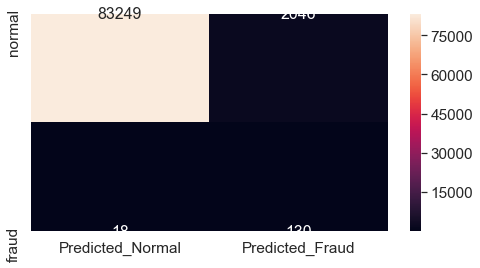

In [71]:
lr_accuracy_ros = accuracy_score(y_test, lr_predict_ros)
lr_recall_ros = recall_score(y_test, lr_predict_ros)
lr_cm_ros = confusion_matrix(y_test, lr_predict_ros)
lr_auc_ros = roc_auc_score(y_test, lr_predict_ros)

print("Accuracy: {:.4%}".format(lr_accuracy_ros))
print("Recall: {:.4%}".format(lr_recall_ros))
print("ROC AUC: {:.4%}".format(lr_auc_ros))

lr_cm = pd.DataFrame(lr_cm, ['normal','fraud'],['Predicted_Normal','Predicted_Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(lr_cm, annot=True,annot_kws={"size": 16},fmt='g')

## Logistic regression on SMOTE oversampling data

In [72]:
lr = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
lr.fit(X_smote, y_smote)

LogisticRegression(max_iter=200, n_jobs=-1, random_state=0)

In [73]:
lr_predict_smote = lr.predict(X_test)

Accuracy: 97.6780%
Recall: 87.8378%
ROC AUC: 92.7664%


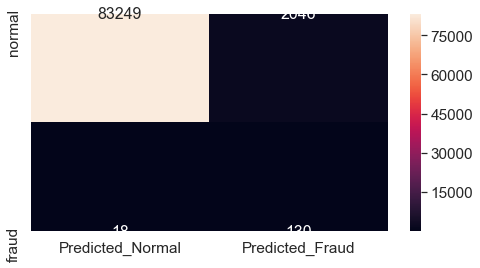

In [74]:
lr_accuracy_smote = accuracy_score(y_test, lr_predict_smote)
lr_recall_smote = recall_score(y_test, lr_predict_smote)
lr_cm_smote = confusion_matrix(y_test, lr_predict_smote)
lr_auc_smote = roc_auc_score(y_test, lr_predict_smote)

print("Accuracy: {:.4%}".format(lr_accuracy_smote))
print("Recall: {:.4%}".format(lr_recall_smote))
print("ROC AUC: {:.4%}".format(lr_auc_smote))

lr_cm = pd.DataFrame(lr_cm, ['normal','fraud'],['Predicted_Normal','Predicted_Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(lr_cm, annot=True,annot_kws={"size": 16},fmt='g')

## Logistic regression on Adasyn oversampling data

In [75]:
lr = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
lr.fit(X_ads, y_ads)

LogisticRegression(max_iter=200, n_jobs=-1, random_state=0)

In [76]:
lr_predict_ads = lr.predict(X_test)

Accuracy: 92.4640%
Recall: 89.8649%
ROC AUC: 91.1667%


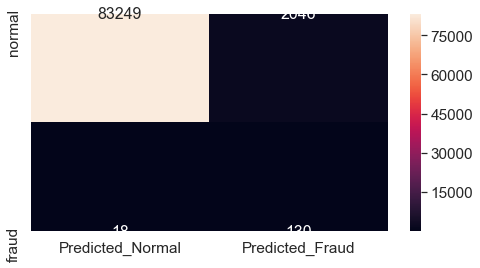

In [77]:
lr_accuracy_ads = accuracy_score(y_test, lr_predict_ads)
lr_recall_ads = recall_score(y_test, lr_predict_ads)
lr_cm_ads = confusion_matrix(y_test, lr_predict_ads)
lr_auc_ads = roc_auc_score(y_test, lr_predict_ads)

print("Accuracy: {:.4%}".format(lr_accuracy_ads))
print("Recall: {:.4%}".format(lr_recall_ads))
print("ROC AUC: {:.4%}".format(lr_auc_ads))

lr_cm = pd.DataFrame(lr_cm, ['normal','fraud'],['Predicted_Normal','Predicted_Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(lr_cm, annot=True,annot_kws={"size": 16},fmt='g')

perfom cross validation on the X_train & y_train to create:
X_train_cv
X_test_cv
y_train_cv
y_test_cv

###### Similarly explore other algorithms on balanced dataset by building models like:

###### KNN Random Forest XGBoost

Apart from logistic regression let us explore other option since it a classification problem logistic regression is prefferred over all other

In [78]:
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

Using SMOTE we got: Accuracy: 97.6780% Recall: 87.8378% ROC AUC: 92.7664% Also we are not loosing any information hence we will use this technique further

# Random Forest

Let's first fit a random forest model with default hyperparameters.

one of the most popular algorithms in machine learning. Random forests use a technique known as bagging, which is an ensemble method. So before diving into random forests, let's first understand ensembles.

In [79]:

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()


In [80]:
# fit
rfc.fit(X_smote,y_smote)

RandomForestClassifier()

In [81]:
# Making predictions
predictions = rfc.predict(X_test)

In [82]:
# Making predictions
predictions = rfc.predict(X_test)

In [83]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.78      0.82       148

    accuracy                           1.00     85443
   macro avg       0.93      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [84]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[85277    18]
 [   32   116]]


In [85]:
print(accuracy_score(y_test,predictions))

0.9994148145547324


let's now look at the list of hyperparameters which we can tune to improve model performance.

In [86]:
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [87]:
# Fit on training data
model.fit(X_smote, y_smote)

RandomForestClassifier(max_features='sqrt')

In [88]:
# Making predictions
predictions = model.predict(X_test)

In [89]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.76      0.82       148

    accuracy                           1.00     85443
   macro avg       0.94      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [90]:
# Probabilities for each class
rf_probs = model.predict_proba(X_test)[:, 1]

In [91]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)

In [92]:
roc_value

0.9631785472675911

In [93]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

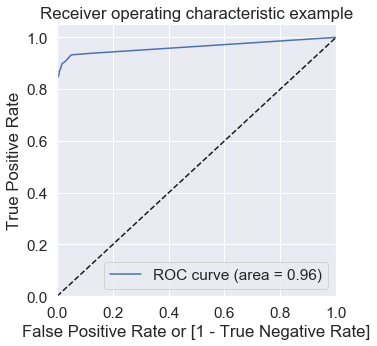

In [94]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, rf_probs, drop_intermediate = False )

draw_roc(y_test, rf_probs)

### XG BOOST

In [96]:
import xgboost as xgb

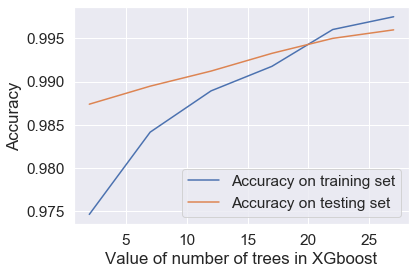

In [97]:
from xgboost import XGBClassifier
tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_smote,y_smote)
    score1.append(xgb.score(X_smote,y_smote))
    score2.append(xgb.score(X_test,y_test))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

As we can see accuracy is increasing for the test and stabilizes at one point

In [98]:
xgb=XGBClassifier(n_estimators=18)
xgb.fit(X_smote,y_smote)
print('Accuracy of XGB on the testing dataset is :{:.3f}'.format(xgb.score(X_test,y_test)))

Accuracy of XGB on the testing dataset is :0.994


In [99]:
# we got a 98% score using xgboost

In [100]:
print(xgb.feature_importances_)

[0.00971581 0.01339805 0.01451501 0.04436496 0.00739075 0.01326648
 0.00831241 0.02650176 0.01469882 0.02615761 0.01907349 0.02308792
 0.01576943 0.56196994 0.01074248 0.00791412 0.01825426 0.01554173
 0.01154233 0.01104672 0.01001523 0.00245873 0.01681146 0.01852699
 0.02076271 0.01351872 0.01395103 0.02044322 0.01024794]


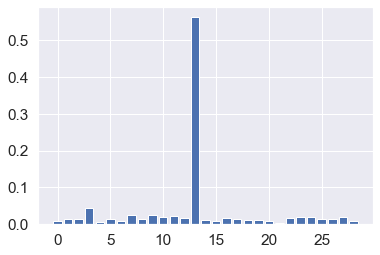

In [101]:
pyplot.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
pyplot.show()

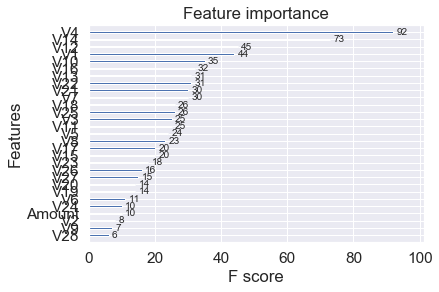

In [102]:
from xgboost import plot_importance
plot_importance(xgb)
pyplot.show()

#### 3. Cross-Validation:

The following figure illustrates k-fold cross-validation with k=4. There are some other schemes to divide the training set, we'll look at them briefly later.

### K-Fold Cross Validation

It is a statistical technique which enables us to make extremely efficient use of available data It divides the data into several pieces, or 'folds', and uses each piece as test data one at a time

In [103]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [104]:
xgb=XGBClassifier(n_estimators=18)
scores = cross_val_score(xgb, X_smote, y_smote, scoring='r2', cv=5)
scores

array([0.96638529, 0.97196262, 0.97452517, 0.96990252, 0.97482665])

In [ ]:
# the other way of doing the same thing (more explicit)

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores_1 = cross_val_score(xgb, X_smote, y_smote, scoring='r2', cv=folds)
scores_1

We used several methods to predict the default the best result we got by using XGboost on data which was sampled using SMOTE the Accuracy of XGB on the testing dataset is :0.981. Also the important features are:V4,V14,V12,V16,V11. Also by performing logistic regression we got a good score of Accuracy: 97.6780% Recall: 87.8378% ROC AUC: 92.7664% For classification model.